# Pymaceuticals Inc.
---

### Analysis

- Note that the data for subject g989 was removed as duplicate (13 data points); this might have some impact in the calculations 
- Based in tumor volume summary table, mean and median values per drug are relatively close between them, which can be related to few outliers / outliers not too far. This can be confirmed in outlier calculation, in which only Infubinol data has outlier.
- Considering Mouse IDs with 10 Timepoints, the plots for Placebo-, Infubinol- and Ceftamin-based treatments show that tumor volumes increased 
- Considering Mouse IDs with 10 Timepoints, the plots for Capomulin- and Ramicane-based treatments show that most tumor volumes decreased (1 increased for Capomulin)
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how = 'left', on = ['Mouse ID'])

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df['Mouse ID'] == 'g989']
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_index_s = duplicate_mouse_df.index
clean_df = combined_df.drop(duplicate_mouse_index_s)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_s = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_s = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_s = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sigma_s = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_s = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Mean Tumor Volume'      : mean_s,
    'Median Tumor Volume'    : median_s,
    'Tumor Volume Variance'  : var_s,
    'Tumor Volume Std. Dev.' : sigma_s,
    'Tumor Volume Std. Err.' : sem_s   
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

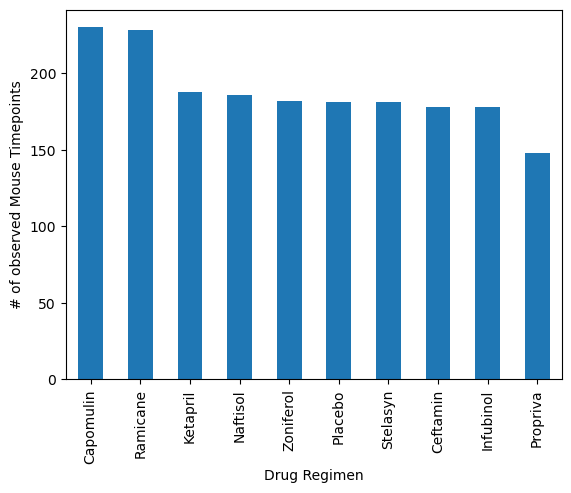

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = clean_df.groupby(by = 'Drug Regimen')['Timepoint'].count().sort_values(ascending = False)
bar_plot.plot(kind = 'bar', ylabel = '# of observed Mouse Timepoints')
plt.show()

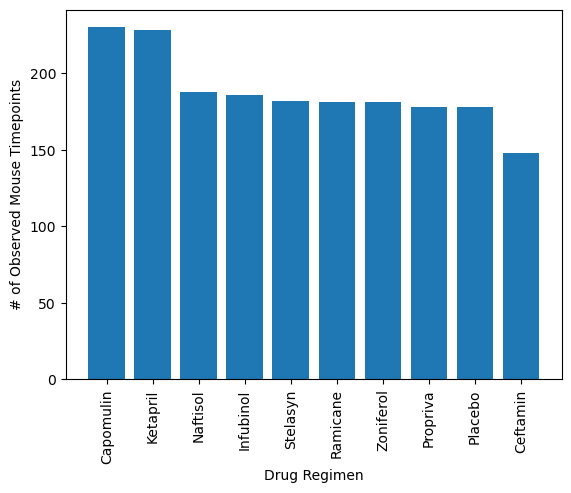

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_label = clean_df['Drug Regimen'].unique()
y = clean_df.groupby(by = 'Drug Regimen')['Timepoint'].count().sort_values(ascending = False).values
x_axis = [i for i in range(len(y))]

fig, axes = plt.subplots()
axes.bar(x = x_axis, height = y)
axes.set_xticks(ticks = x_axis, labels = x_label, rotation = 'vertical')
axes.set_xlabel('Drug Regimen')
axes.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

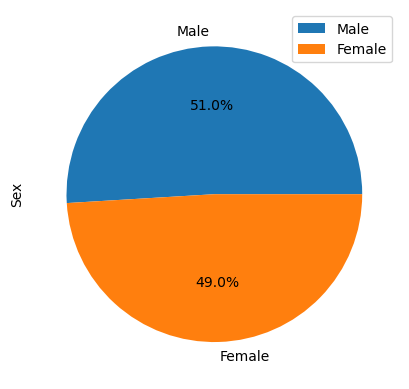

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_count = clean_df[clean_df['Sex'] == 'Female']['Sex'].count()
male_count = clean_df[clean_df['Sex'] == 'Male']['Sex'].count()
pie_df = pd.DataFrame({
    'Count' : [male_count, female_count]},
    index = ['Male', 'Female'])
pie_df.plot(y = 'Count', kind = 'pie', autopct = '%1.1f%%', ylabel = 'Sex')
plt.show()

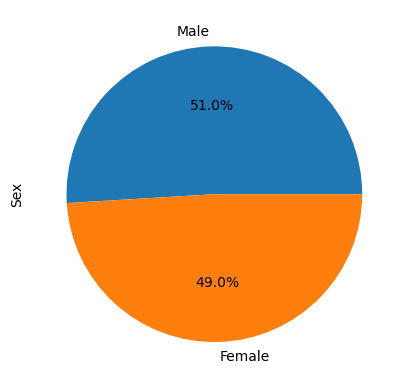

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, axes = plt.subplots()
axes.pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%')
axes.set_ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = clean_df.groupby(by = 'Mouse ID')['Timepoint'].max().to_frame()
max_time_df.reset_index(inplace = True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
volume_max_time_df = pd.merge(clean_df, max_time_df, how = 'inner', on = ['Mouse ID', 'Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume_l = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = volume_max_time_df.loc[volume_max_time_df['Drug Regimen'] == t, 'Tumor Volume (mm3)']
    # add subset 
    volume_l.append(volume)
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([0.25, 0.5, 0.75])
    lowq = quartiles[0.25]
    uppq = quartiles[0.75]
    mean = volume.mean()
    iqr = uppq - lowq
    lowbound = lowq - (1.5 * iqr)
    uppbound = uppq + (1.5 * iqr)
    outlier = volume.loc[(lowbound > volume) | (volume> uppbound)]
    
    print(f"{t}'s potential outliers: ", outlier)

Capomulin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:  20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)


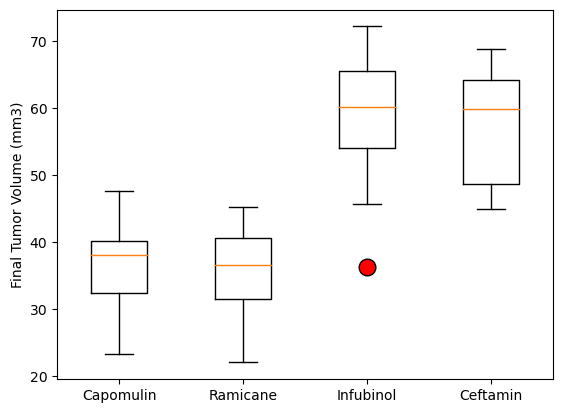

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, box_plot = plt.subplots()
box_plot.boxplot(volume_l, labels = treatments, flierprops = dict(markerfacecolor = 'r', markersize = 12)) 
box_plot.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

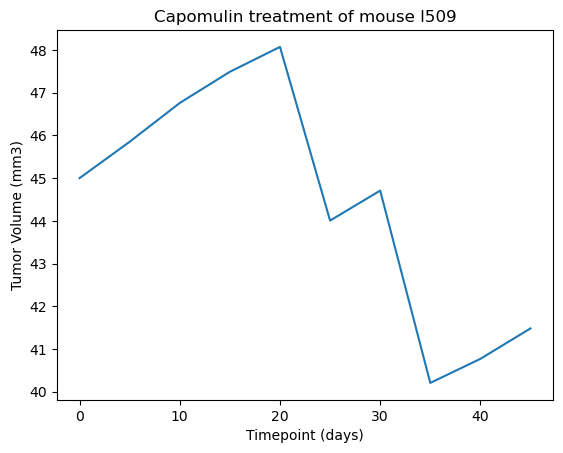

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = clean_df.loc[clean_df['Mouse ID'] == 'l509']#, 'Tumor Volume (mm3)']
fig, line_plot = plt.subplots()
line_plot.plot(l509['Timepoint'], l509['Tumor Volume (mm3)'])
line_plot.set_title('Capomulin treatment of mouse l509')
line_plot.set_xlabel('Timepoint (days)')
line_plot.set_ylabel('Tumor Volume (mm3)')
plt.show()

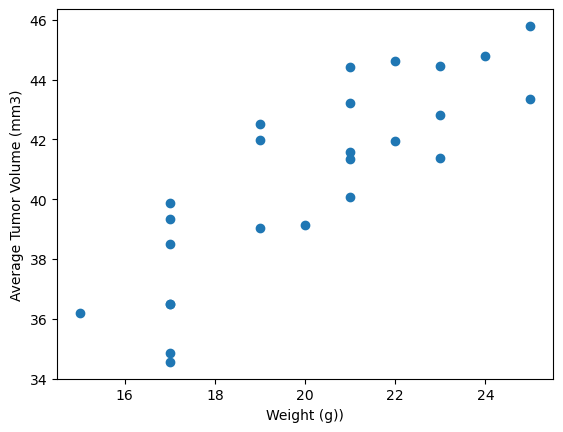

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'].groupby(by = 'Mouse ID').mean(numeric_only = True)
capomulin_weight

fig, scatter_plot = plt.subplots()
scatter_plot.scatter(capomulin_weight['Weight (g)'], capomulin_weight['Tumor Volume (mm3)'])
scatter_plot.set_xlabel('Weight (g))')
scatter_plot.set_ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


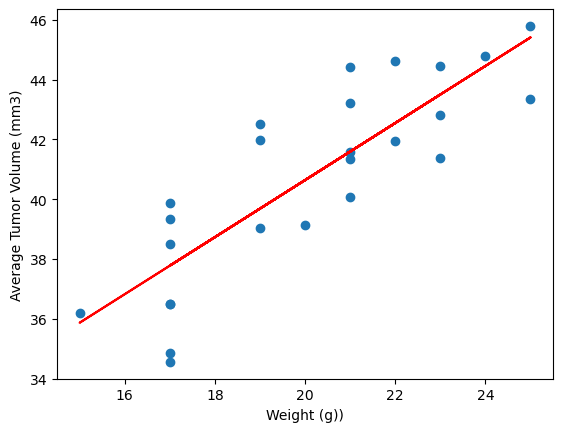

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weight['Weight (g)'], capomulin_weight['Tumor Volume (mm3)'])
est_y = slope * capomulin_weight['Weight (g)'] + intercept
print(f'The correlation between mouse weight and the average tumor volume is {rvalue:.2f}')

plt.scatter(capomulin_weight['Weight (g)'], capomulin_weight['Tumor Volume (mm3)'])
plt.plot(capomulin_weight['Weight (g)'], est_y, color = 'red')
plt.xlabel('Weight (g))')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

### Additional section 
Function to plot several 'Mouse ID' in 'Timepoint' v 'Tumor Volume (mm3)'

In [19]:
def plot_ids(treatment):
    ids = clean_df[clean_df['Drug Regimen'] == treatment]['Mouse ID'].unique()
    
    for id in ids:
        x = clean_df.loc[clean_df['Mouse ID'] == id]['Timepoint']
        y = clean_df.loc[clean_df['Mouse ID'] == id]['Tumor Volume (mm3)']
        if len(x) == 10:
            plt.plot(x, y, label = id, marker = '*')
    plt.show()

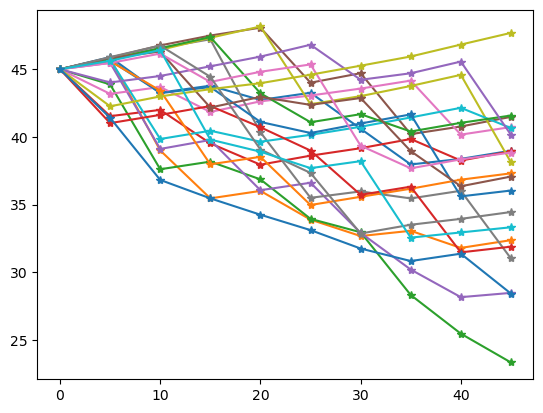

In [20]:
plot_ids('Capomulin')

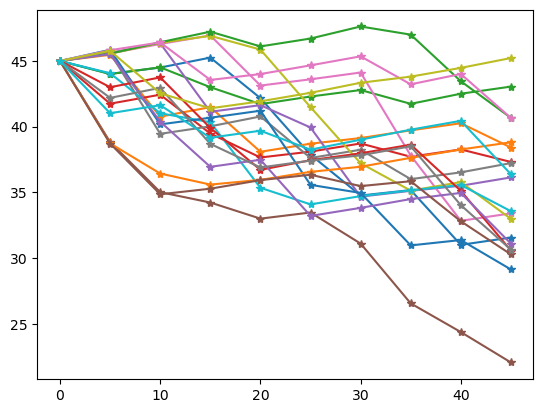

In [21]:
plot_ids('Ramicane')

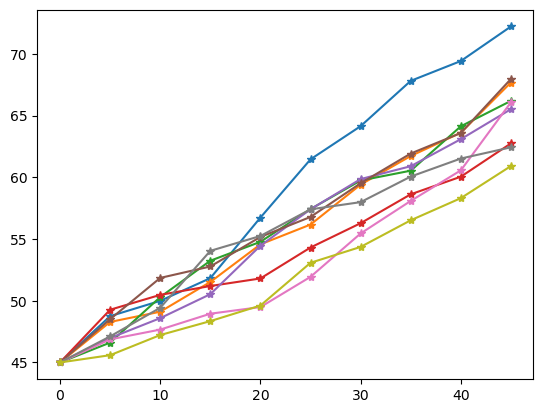

In [22]:
plot_ids('Infubinol')

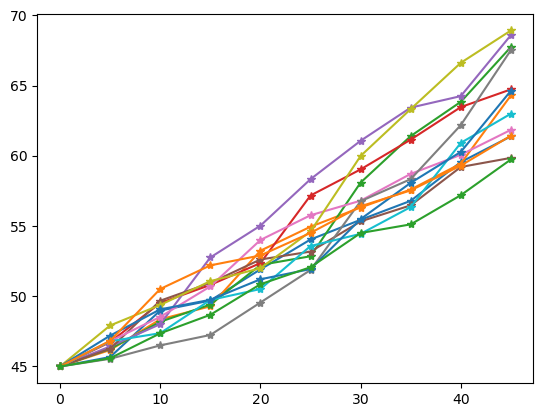

In [23]:
plot_ids('Ceftamin')

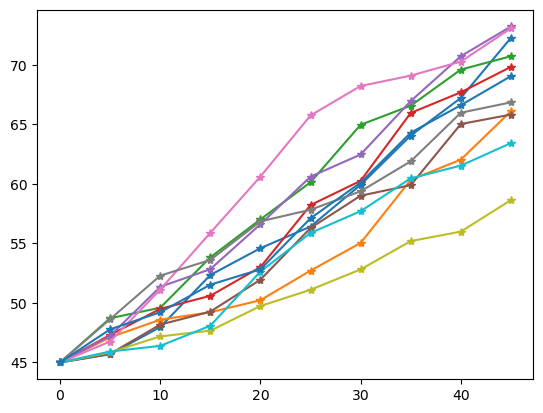

In [24]:
plot_ids('Placebo')